In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
#Data Preprocessing

In [6]:
data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [8]:
data.Gender = data.Gender.fillna('Male')

In [9]:
data['Married'].value_counts()

Married
Yes    228
No     153
Name: count, dtype: int64

In [10]:
data.Married = data.Married.fillna('Yes')

In [11]:
data['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [12]:
data.Dependents = data.Dependents.fillna('0')

In [13]:
data['Self_Employed'].value_counts()

Self_Employed
No     325
Yes     35
Name: count, dtype: int64

In [14]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [15]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [16]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [17]:
data['Credit_History'].value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [18]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [19]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
data['LoanAmount'].value_counts()

LoanAmount
120.0    19
110.0    16
100.0    15
128.0    11
113.0    11
         ..
36.0      1
61.0      1
146.0     1
142.0     1
40.0      1
Name: count, Length: 101, dtype: int64

In [21]:
data.LoanAmount = data.LoanAmount.fillna(120.0)

In [22]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
#Split the data into input and output
X = data.iloc[:,1:12].values
y = data.iloc[:,12]

In [24]:
y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
376    Y
377    Y
378    Y
379    Y
380    N
Name: Loan_Status, Length: 381, dtype: object

In [25]:
#train and test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=0)

In [28]:
X_train

array([['Female', 'Yes', '0', ..., 360.0, 1.0, 'Rural'],
       ['Female', 'No', '2', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 0.0, 'Semiurban'],
       ...,
       ['Male', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Semiurban']],
      shape=(323, 11), dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
labelencoder = LabelEncoder()

In [31]:
for i in range(0,5):
  X_train[:,i] = labelencoder.fit_transform(X_train[:,i])
X_train[:,10] = labelencoder.fit_transform(X_train[:,10])

In [32]:
labelencoder_y = LabelEncoder()

In [33]:
y_train = labelencoder_y.fit_transform(y_train)

In [34]:
labelencoder_xt = LabelEncoder()

In [35]:
for i in range(0,5):
  X_test[:,i] = labelencoder.fit_transform(X_test[:,i])
X_test[:,10] = labelencoder.fit_transform(X_test[:,10])

In [36]:
y_test = labelencoder_y.fit_transform(y_test)

In [37]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [38]:
X_train

array([[0, 1, 0, ..., 360.0, 1.0, 0],
       [0, 0, 2, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 0.0, 1],
       ...,
       [1, 0, 0, ..., 360.0, 1.0, 0],
       [0, 0, 0, ..., 360.0, 0.0, 1],
       [1, 1, 1, ..., 360.0, 1.0, 1]], shape=(323, 11), dtype=object)

In [39]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [41]:
X_train = sc.fit_transform(X_train)

In [42]:
X_train

array([[-1.80277564,  0.79974615, -0.66372088, ...,  0.28806716,
         0.42796049, -1.38739158],
       [-1.80277564, -1.25039676,  1.397643  , ...,  0.28806716,
         0.42796049, -0.10335869],
       [ 0.5547002 ,  0.79974615, -0.66372088, ...,  0.28806716,
        -2.33666429, -0.10335869],
       ...,
       [ 0.5547002 , -1.25039676, -0.66372088, ...,  0.28806716,
         0.42796049, -1.38739158],
       [-1.80277564, -1.25039676, -0.66372088, ...,  0.28806716,
        -2.33666429, -0.10335869],
       [ 0.5547002 ,  0.79974615,  0.36696106, ...,  0.28806716,
         0.42796049, -0.10335869]], shape=(323, 11))

In [43]:
X_test = sc.fit_transform(X_test)

In [44]:
# PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=3)

In [47]:
X_train = pca.fit_transform(X_train)

In [48]:
X_test = pca.fit_transform(X_test)

In [49]:
X_train

array([[ 6.07681059e-01,  3.97475396e+00,  4.16650326e-01],
       [-9.44797918e-01,  7.35971231e-01,  2.39206559e-01],
       [ 2.22760701e-01, -2.67124070e-01,  1.83721637e+00],
       [ 1.92594121e-02, -1.10236120e+00,  6.70228910e-01],
       [-1.67685407e+00, -4.18740804e-01,  5.06551707e-01],
       [ 1.03893907e+00, -1.76757786e+00, -1.15117459e+00],
       [-5.44979319e-01,  1.09704027e+00, -8.31606932e-02],
       [ 1.05775111e+00, -9.32073739e-01,  1.42353296e+00],
       [-1.58430713e+00,  1.13060253e+00, -8.22954733e-01],
       [-7.95845055e-01,  6.16257475e-01,  2.50016148e-01],
       [ 7.15624459e-01, -7.58087402e-01, -5.53012383e-01],
       [ 5.54239307e-01, -1.33704211e-01, -2.82015955e+00],
       [ 1.82838589e+00, -7.40138575e-01, -1.46555479e+00],
       [ 1.89607949e-01,  1.93850966e-02,  2.04500686e+00],
       [ 4.06903100e-01,  3.23512796e-01,  6.51047933e-01],
       [ 1.61150894e+00,  6.67595388e-01, -9.97423806e-02],
       [ 5.50486182e-01, -8.38843118e-01

In [50]:
#Classification
# logistic regression
# nearest neighbor
# SVM

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [52]:
lrclf = LogisticRegression(max_iter=100,random_state=0)

In [53]:
lrclf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [54]:
lrclf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
y_pred = lrclf.predict(X_test)

In [56]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [57]:
from sklearn import metrics

In [58]:
metrics.accuracy_score(y_test,y_pred)

0.7241379310344828

In [59]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [60]:
cm

array([[ 0, 16],
       [ 0, 42]])

In [61]:
X_test[:,0]

array([-0.81195778, -1.02511484, -0.94644993,  1.44971399, -2.62119627,
       -2.68826924,  0.2257392 , -2.60296568, -0.23463357,  1.08332174,
       -1.20037122,  0.55657006,  0.7229145 , -2.07938878,  2.09245258,
        0.43435185,  0.32390982, -1.29673975, -0.75773081, -0.0298538 ,
       -1.95476199,  0.3871868 ,  1.94168599,  3.28562154, -0.50102187,
        1.26277819, -2.08141467,  0.39879369, -0.95953061,  4.08937131,
       -0.09561358,  0.96648644, -0.94124856,  1.28542922, -0.40347817,
       -2.32379297,  1.95830774,  0.88580362,  0.01636985,  0.56043344,
       -0.85025487, -0.00743011,  1.36091351, -0.10055129, -1.74861872,
        0.61246378,  1.20762046,  0.11601746, -1.44282045, -1.40903311,
       -0.08166482, -0.35625041, -0.45490623,  0.3078214 ,  1.05641163,
       -0.46374063,  3.19030729,  0.69200763])

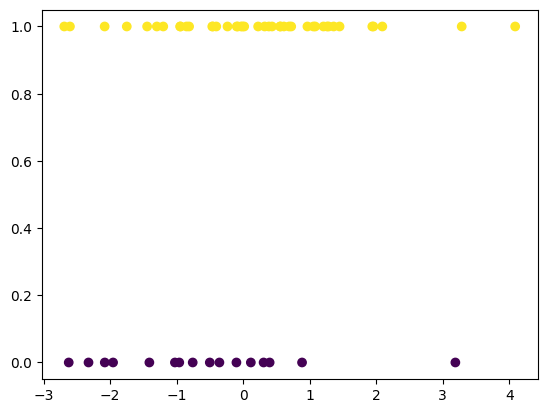

In [62]:
# observed data plot
plt.scatter(X_test[:,0],y_test,c=y_test)

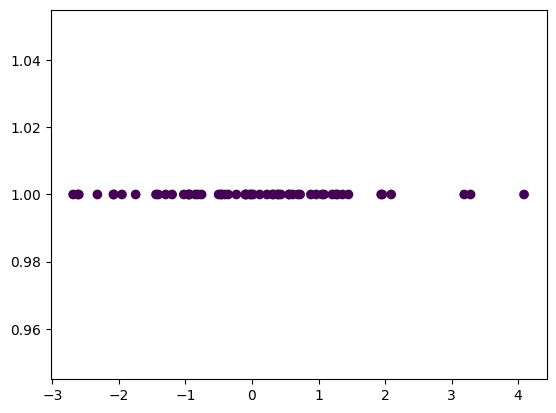

In [63]:
# predicted data plot
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [64]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knnclf = KNeighborsClassifier(n_neighbors=5)

In [66]:
knnclf.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
knnclf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [68]:
y_pred = knnclf.predict(X_test)

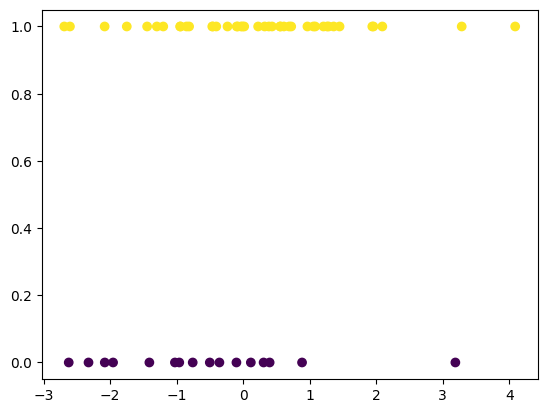

In [69]:
plt.scatter(X_test[:,0],y_test, c=y_test)

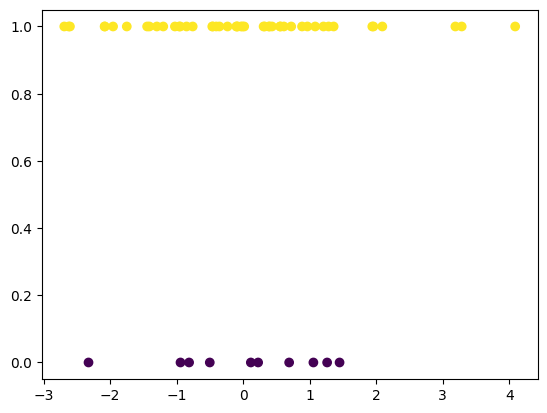

In [70]:
plt.scatter(X_test[:,0],y_pred,c=y_pred)

In [71]:
metrics.accuracy_score(y_test,y_pred)

0.6551724137931034

In [72]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [73]:
cm

array([[ 3, 13],
       [ 7, 35]])

In [74]:
# Support Vector Machine
from sklearn.svm import SVC

In [75]:
svcrbf = SVC(random_state=0)
svclin = SVC(random_state=0)

In [76]:
svcrbf.fit(X_train,y_train)
svclin.fit(X_train,y_train)

SVC(random_state=0)

In [77]:
y_predr = svcrbf.predict(X_test)
y_predl = svclin.predict(X_test)

In [78]:
#rbf svm
metrics.accuracy_score(y_test,y_predr)

0.6724137931034483

In [79]:
#lin svm
metrics.accuracy_score(y_test,y_predl)

0.6724137931034483